<a href="https://colab.research.google.com/github/CamelGoong/DataScience_Practicing/blob/main/%5BBoost%5DAnalysis_3_K_beauty_Online_Overseas_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 라이브러리 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# 시각화를 위한 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [ ]:
df_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/데이터 사이언스/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20220121160118.csv",
                     encoding = "cp949")
df_raw.shape

(450, 27)

In [ ]:
# 국가(대륙)별 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

대양주           45
중동            45
기타            45
일본            45
유럽연합(EU)      45
중남미           45
미국            45
아세안(ASEAN)    45
중국            45
합계            45
Name: 국가(대륙)별, dtype: int64

In [ ]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,37392,38179,36831,35290,44421,45169,40976,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,8160,9183,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,37009,31793,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,2362,2533,2121,1704,1531,1054,946,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,1054,946,791,854,2033,1553,1784,1773,1298,1408,1653,1383
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,3286,3571,2921,2744,3354,2730,2425,2575,2394,1737,1716,1723,1886,1845,1837,3166,1787
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,18,23,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,2712,2402,2546,2362,1672,1678,1651,1834,1779,1721,3059,1738
54,미국,소프트웨어,계,47,57,49,128,182,113,163,116,147,103,82,83,67,45,37,125,175,251,172,269,88,156,118,338


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [ ]:
# .melt()로 분기별 데이터를 행으로 다 만들기

df = df_raw.melt(id_vars = ["국가(대륙)별", "상품군별", "판매유형별"], var_name = "기간", value_name = "백만원") # id_vars: 어떤 것을 id로 만들 것인지 / var_name: variable 열 이름을 설정 / value_name: value 열 이름을 설정

df.shape

(10800, 5)

In [ ]:
df.head(30)

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
5,합계,컴퓨터 및 주변기기,면세점 이외,2014 1/4,-
6,합계,가전·전자·통신기기,계,2014 1/4,13259
7,합계,가전·전자·통신기기,면세점,2014 1/4,-
8,합계,가전·전자·통신기기,면세점 이외,2014 1/4,-
9,합계,소프트웨어,계,2014 1/4,361


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [ ]:
# 원래 object type인데 int로 바꿔줘야 나중에 시각화가 편함.
int("2019 4/4".split()[0])

2019

In [ ]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [ ]:
# 기간에서 분기만 분리하기
df['분기'] = df['기간'].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [ ]:
# -문자를 결측치로 변경하고 float 타입으로 변경하기

df['백만원'] = df['백만원'].replace("-", pd.np.nan).astype(float) # 문자를 결측치로 변경
df['백만원']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [ ]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거 /
df = df[(df['국가(대륙)별'] != "합계") & (df['상품군별'] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [ ]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [ ]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "rP" 데이터만 가져와서 봐야지
# 평균값을 구하는 그래프에서 올바른 값을 표현 가능

df_total = df[df['판매유형별'] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


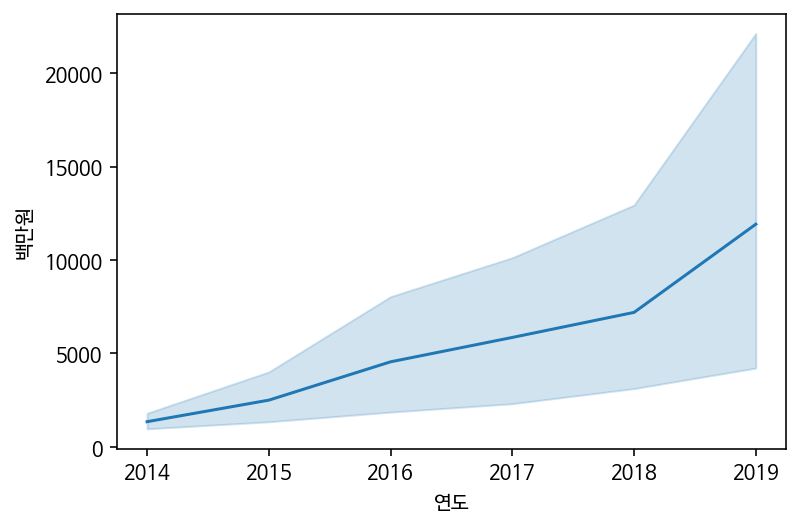

In [ ]:
# 연도, 판매액 lineplot으로 그리기
sns.lineplot(data = df_total, x = "연도", y = "백만원")

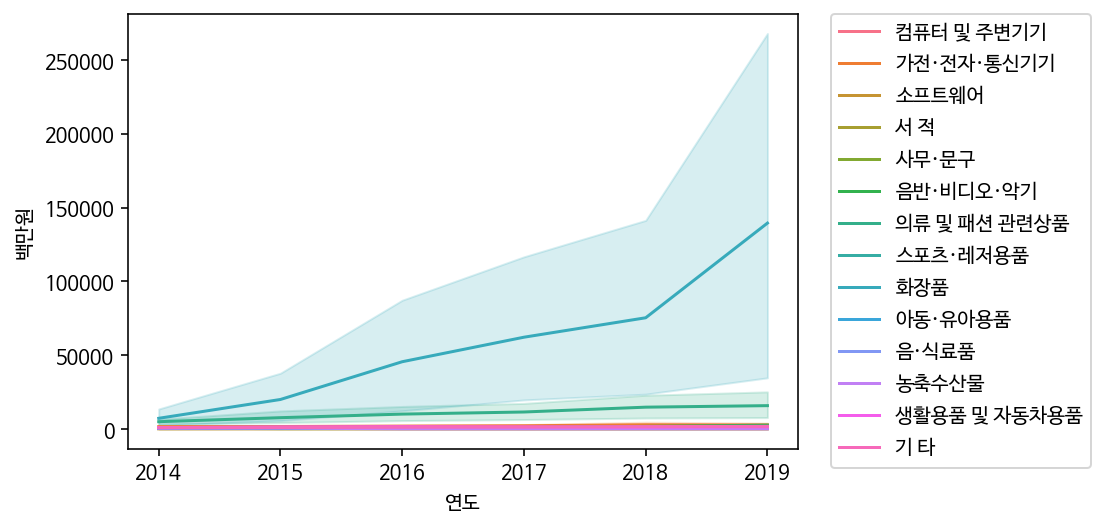

In [ ]:
# 연도, 판매약 lineplot으로 그리고 상품군별로 다른 색상으로 표시
# 범례값을 그래프 밖에다가 표시

sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

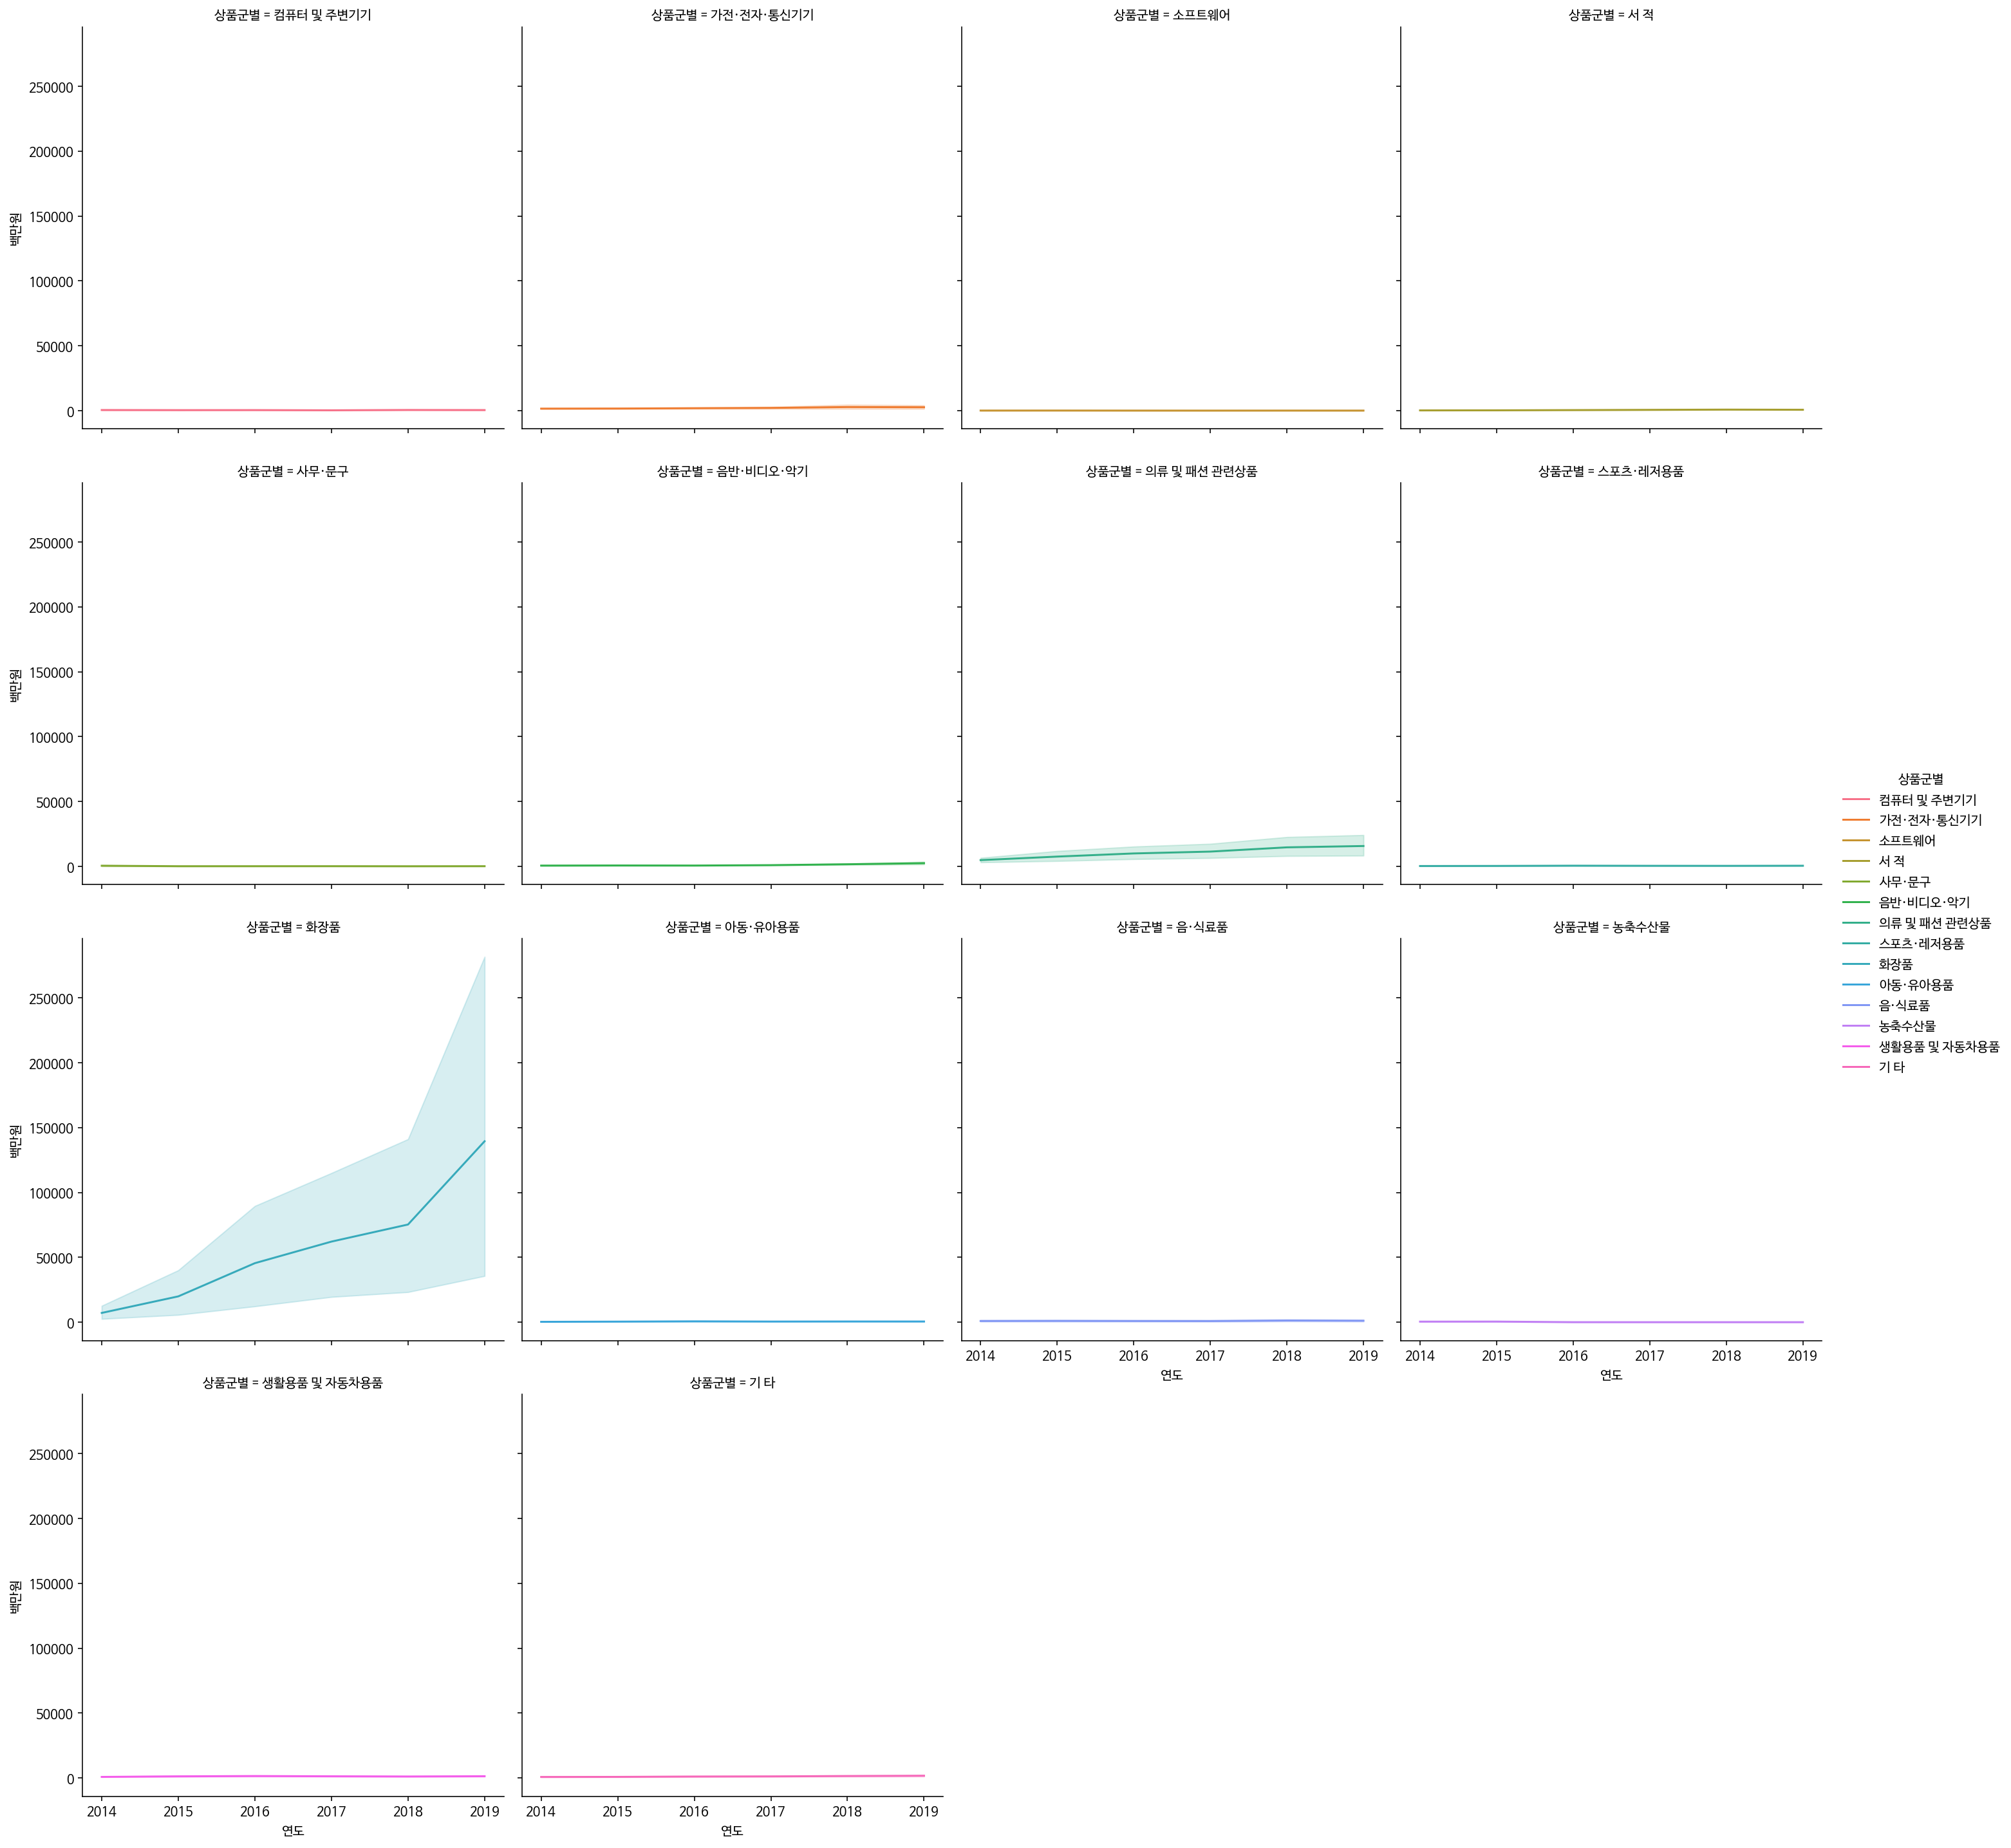

In [ ]:
# 위에 그린 그래프를 서브플롯으로 표시하기
sns.relplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별", kind = "line", col = "상품군별", col_wrap = 4) # col_wrap : 몇줄의 subplot으로 표시할 것인지

In [ ]:
# 화장품, 의류 및 패션관련 상품의 값이 너무 커서 다른 상품군의 값을 관찰하기가 힘듦 -> isin을 사용해 화장품, 의류 및 패션관련 상품만 제외를 하고, df_sub라는 변수에 담기
df_sub = df_total[~df_total['상품군별'].isin(["화장품", "의류 및 패션관련 상품"])].copy()

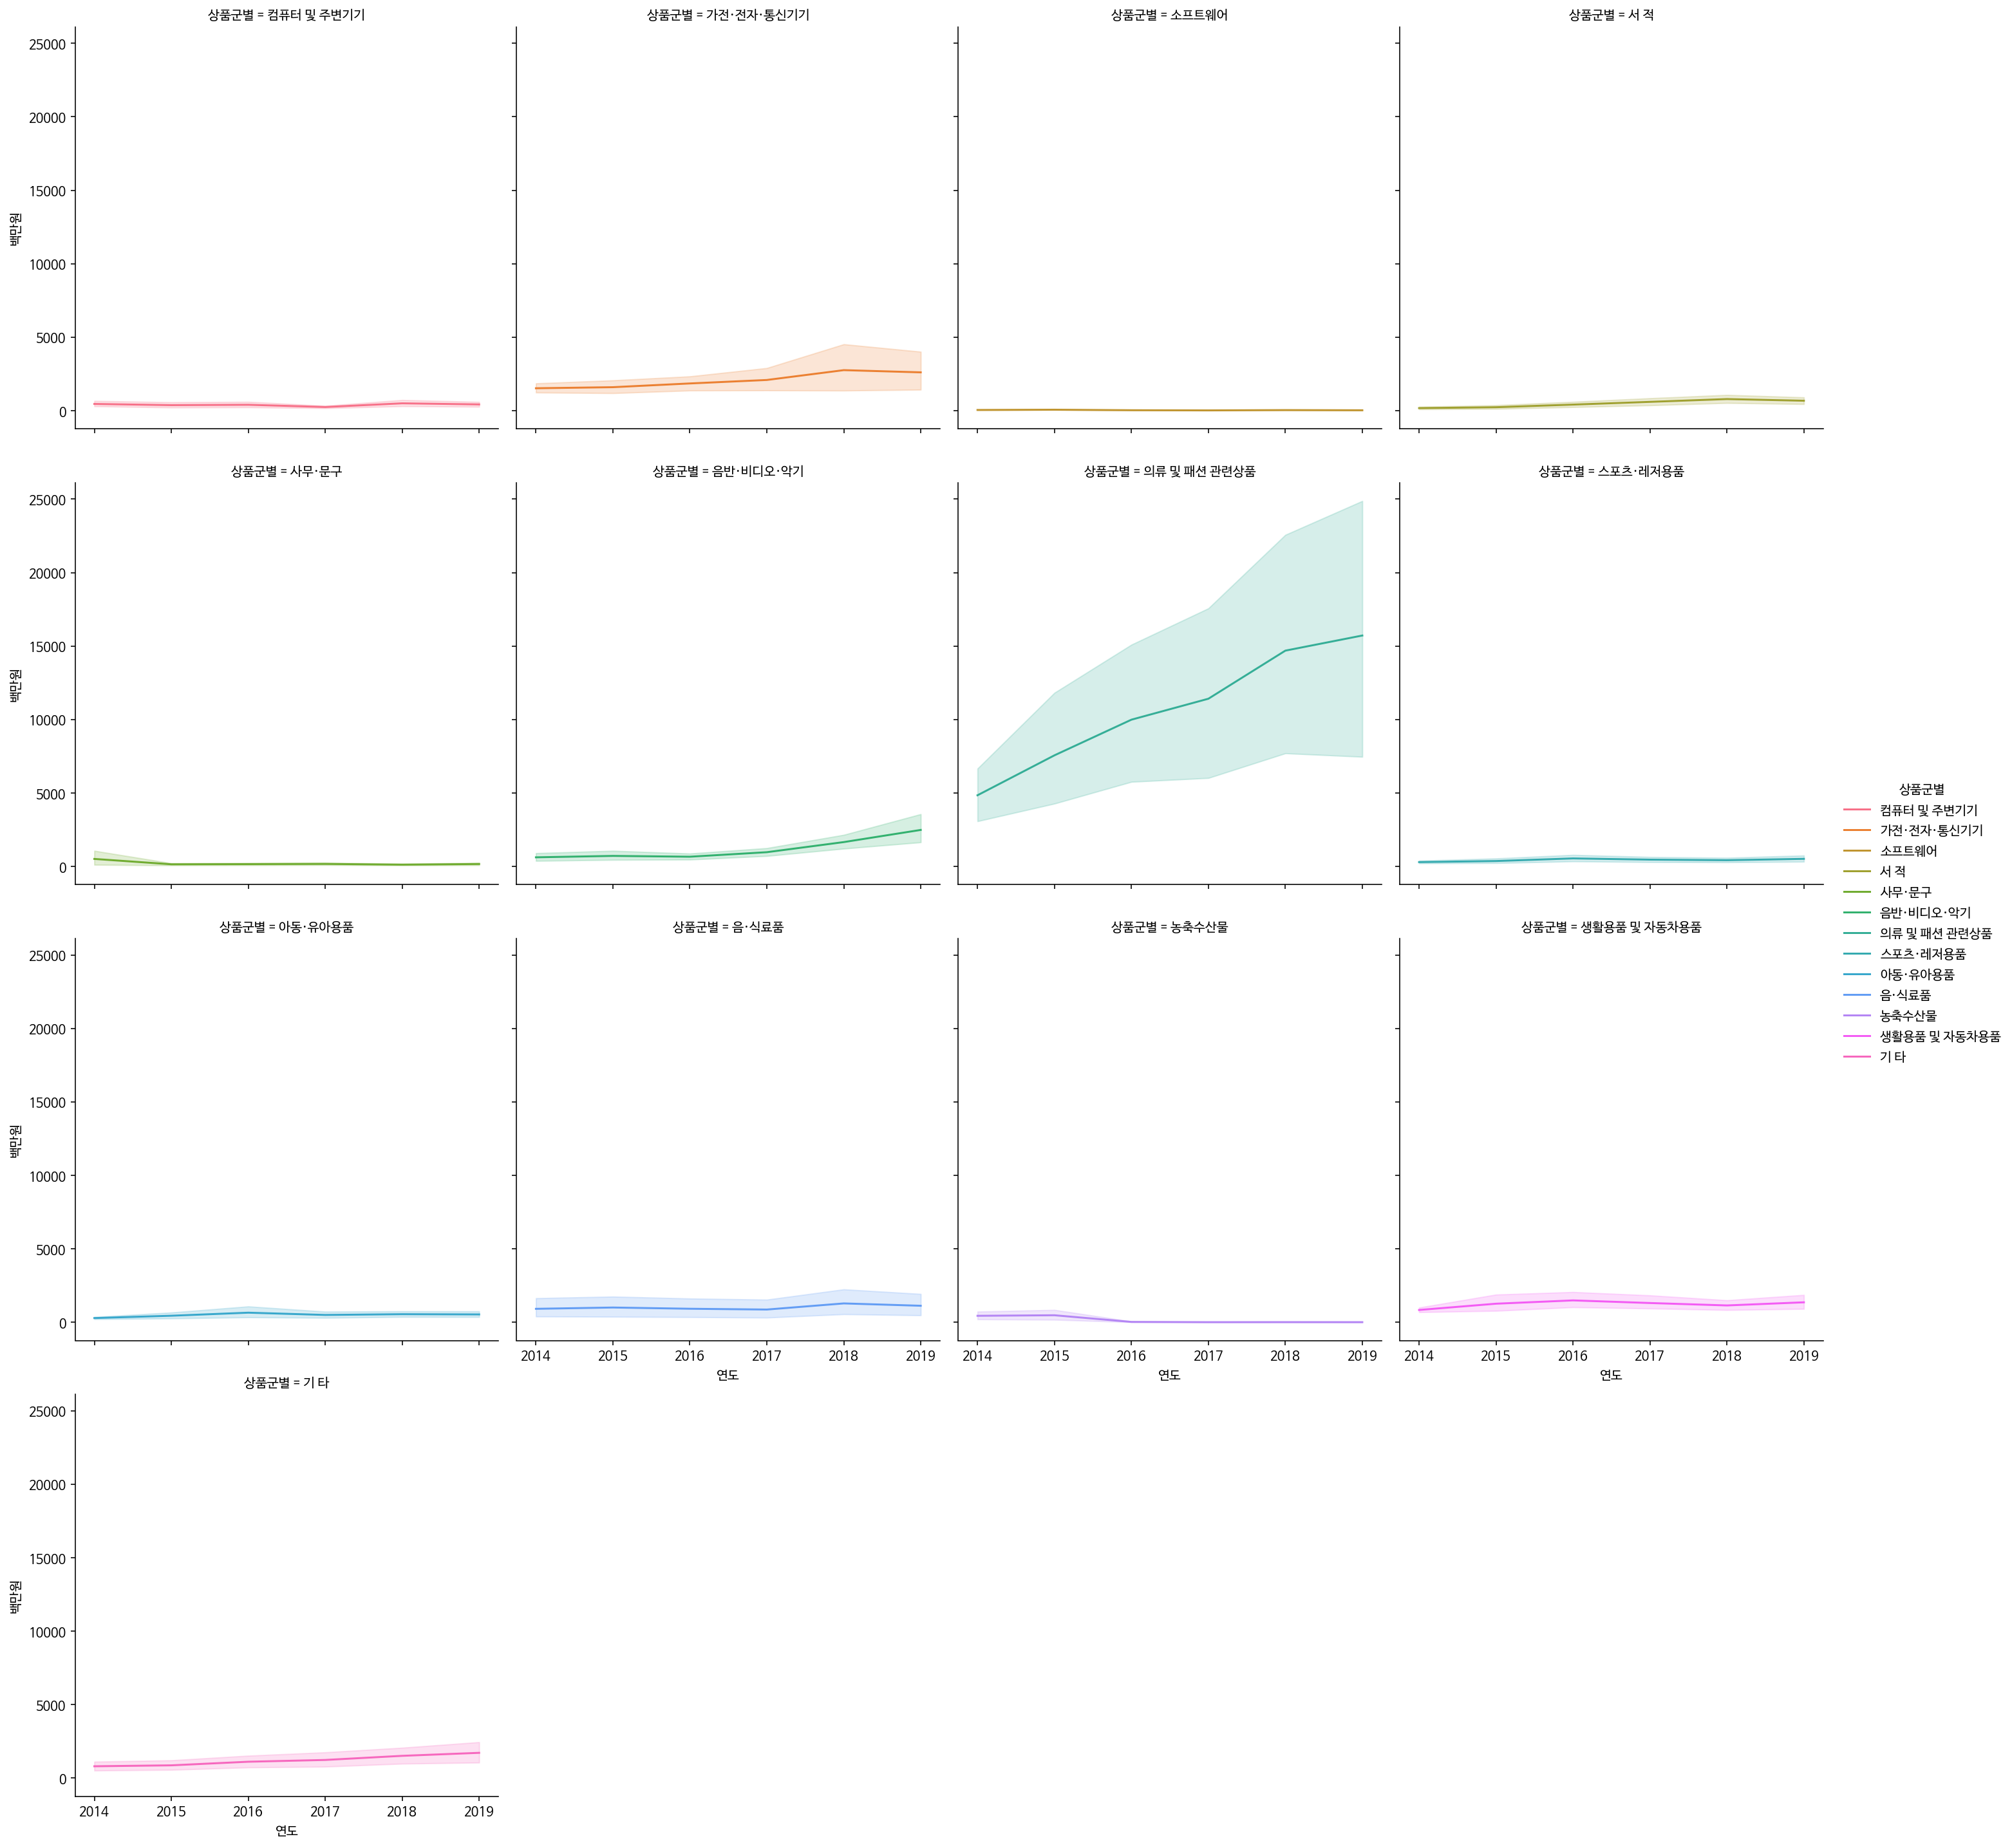

In [ ]:
# 연도별 판매액을 상품군별로 replot을 활용해 서브플롯으로 그려보기(단, 위와 달리 '화장품', "의류 및 패션관련 상품"만 제외)
sns.relplot(data = df_sub, x = "연도", y = "백만원", hue = "상품군별", kind = "line", col = "상품군별", col_wrap = 4)

### 화장품의 온라인쇼핑 해외직접판매액

In [ ]:
# df_cosmetic 이라는 벼수에 상품군별이 화장품인 데이터만 가져오기
df_cosmetic = df_total[df_total['상품군별'] == "화장품"].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

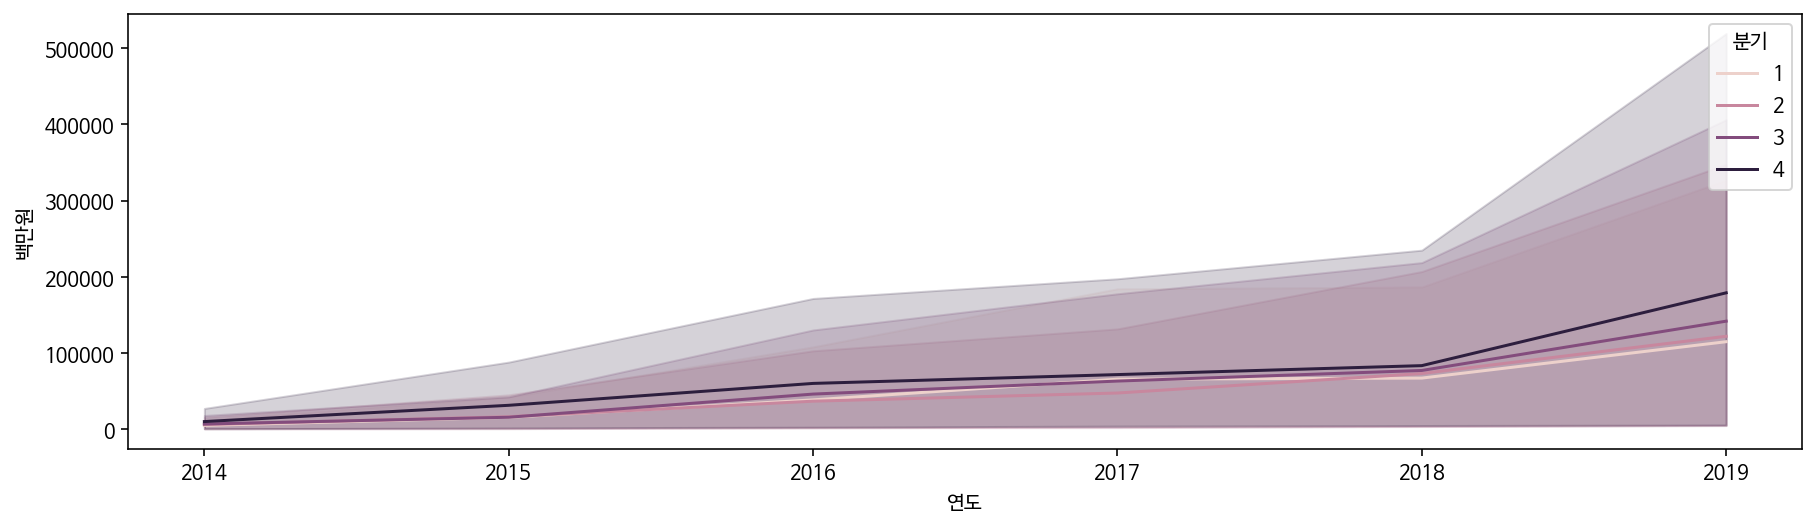

In [ ]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현해보기
plt.figure(figsize = (15,4))
sns.lineplot(data = df_cosmetic, x ="연도", y = "백만원", hue = "분기")

# 4분기로 갈수록 판매량이 증가하고 있음.

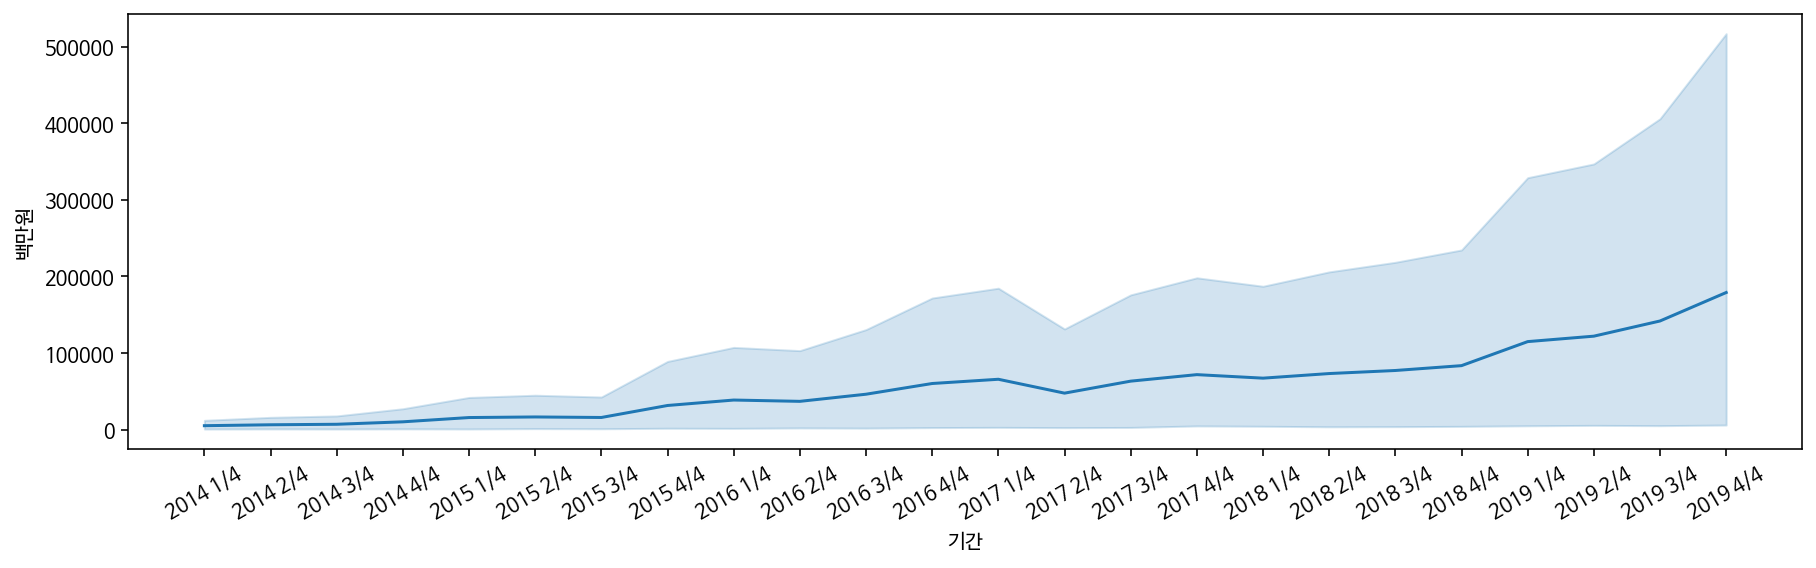

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하기
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30) # 글씨를 30도 기울여서 보기
sns.lineplot(data =df_cosmetic, x = "기간", y = "백만원")

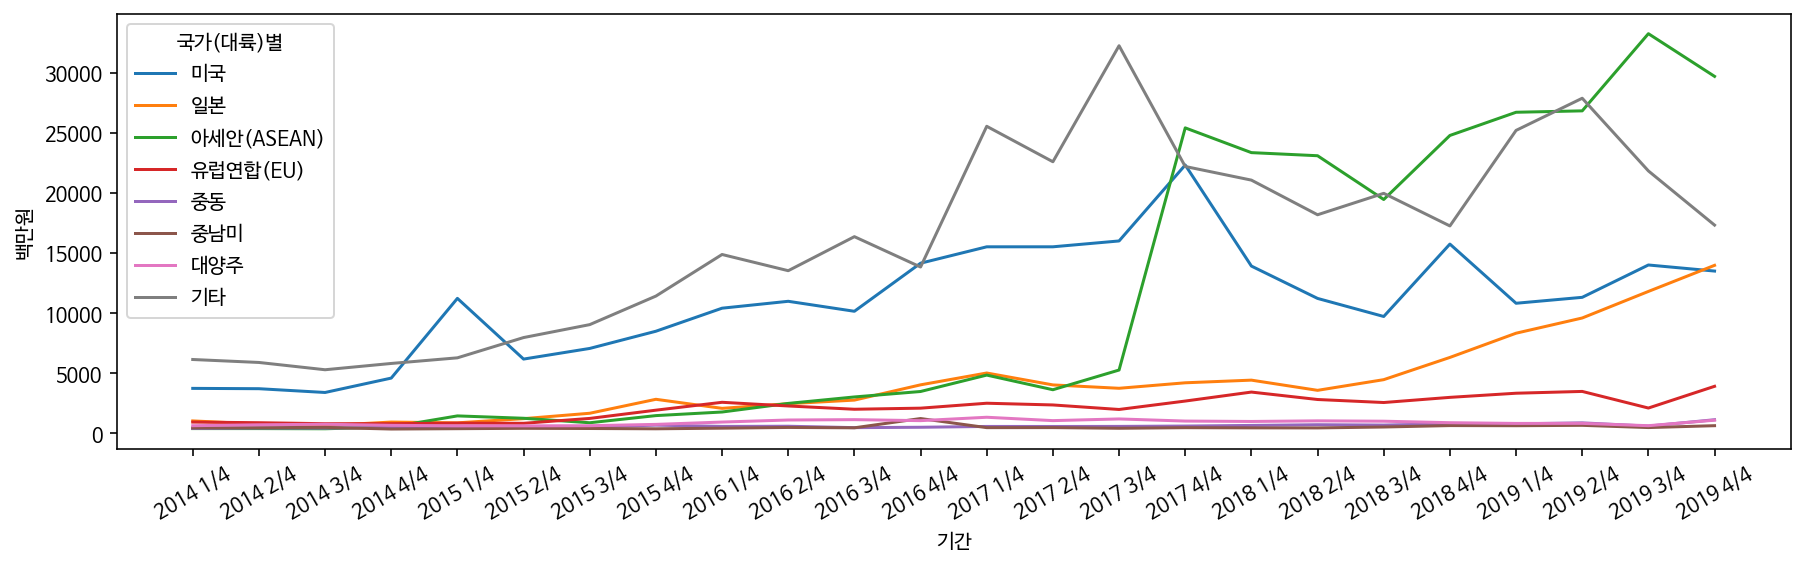

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30) # 글씨를 30도 기울여서 보기
sns.lineplot(data = df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x = "기간", y = "백만원", hue = "국가(대륙)별")

# 중국이 가장 높다 / 그래서 중국만 제외하고 다시 그렸음.
# 아세안과 일본이 꾸준히 성장하고 있음.

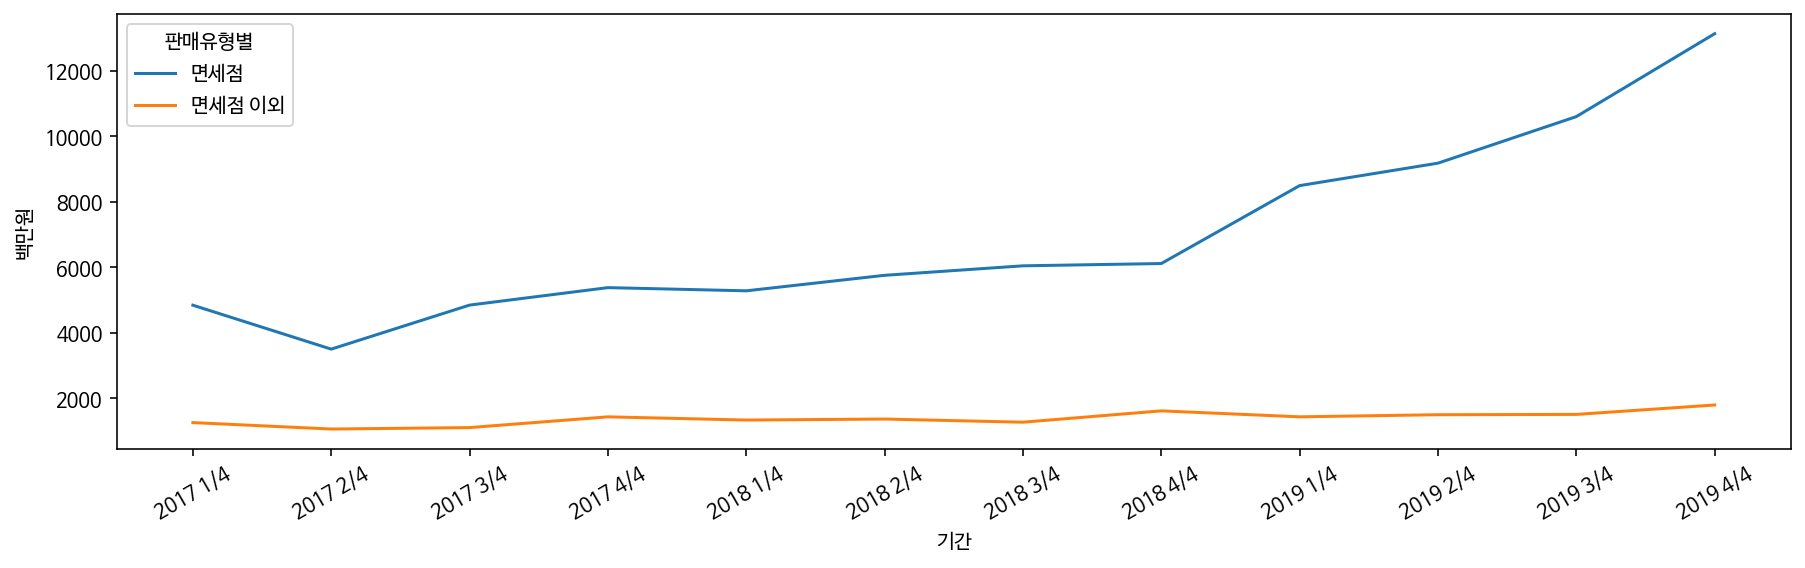

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상으로 표시하기
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
df_sub = df[df['판매유형별'] != "계"].copy()
sns.lineplot(data = df_sub, x = "기간", y = "백만원", hue = "판매유형별", ci = None)

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [ ]:
df_fashion = df[(df['상품군별'] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()



,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


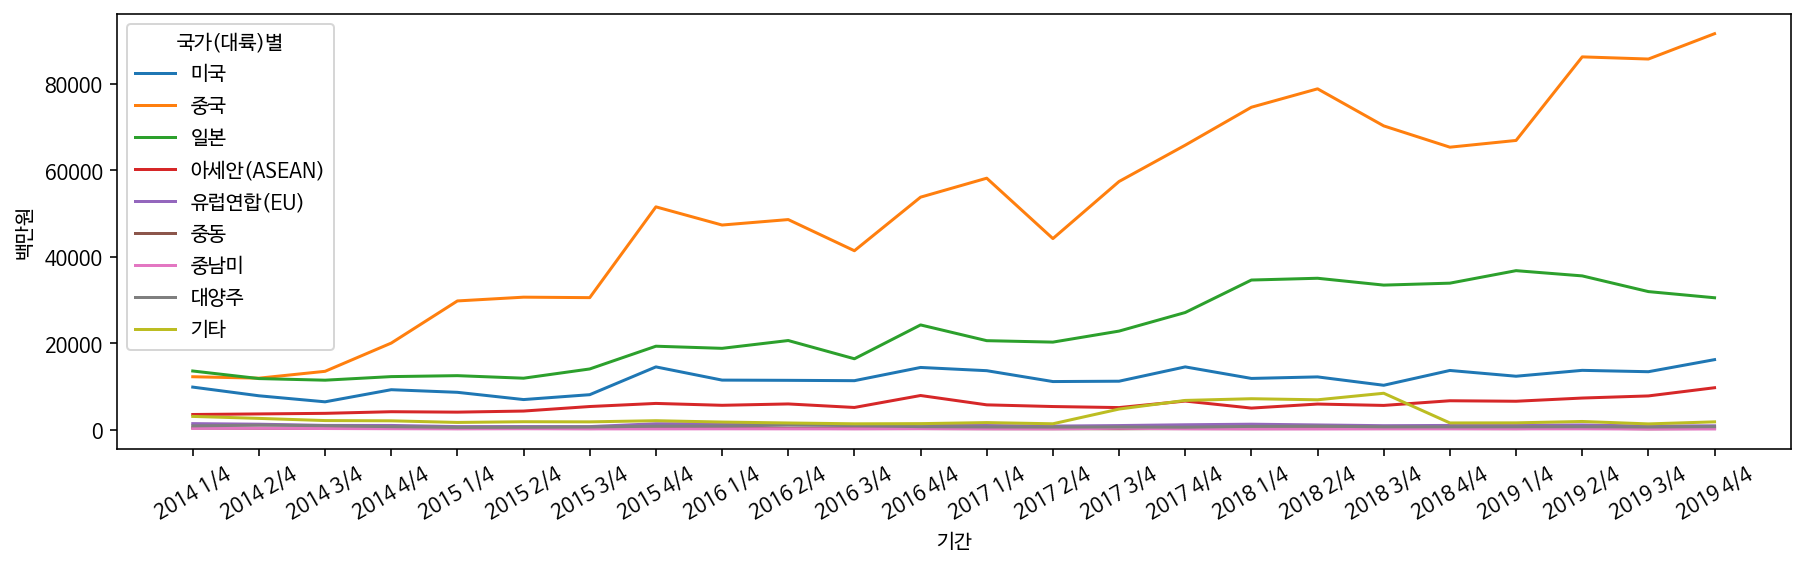

In [ ]:
# '의류 및 패션관련 상품' 판매액에 대한 기간별 금액 데이터 시각화하고
# '국가(대륙)별로 다른 색상으로 표시하기
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data =df_fashion, x = "기간", y = "백만원", hue = "국가(대륙)별")

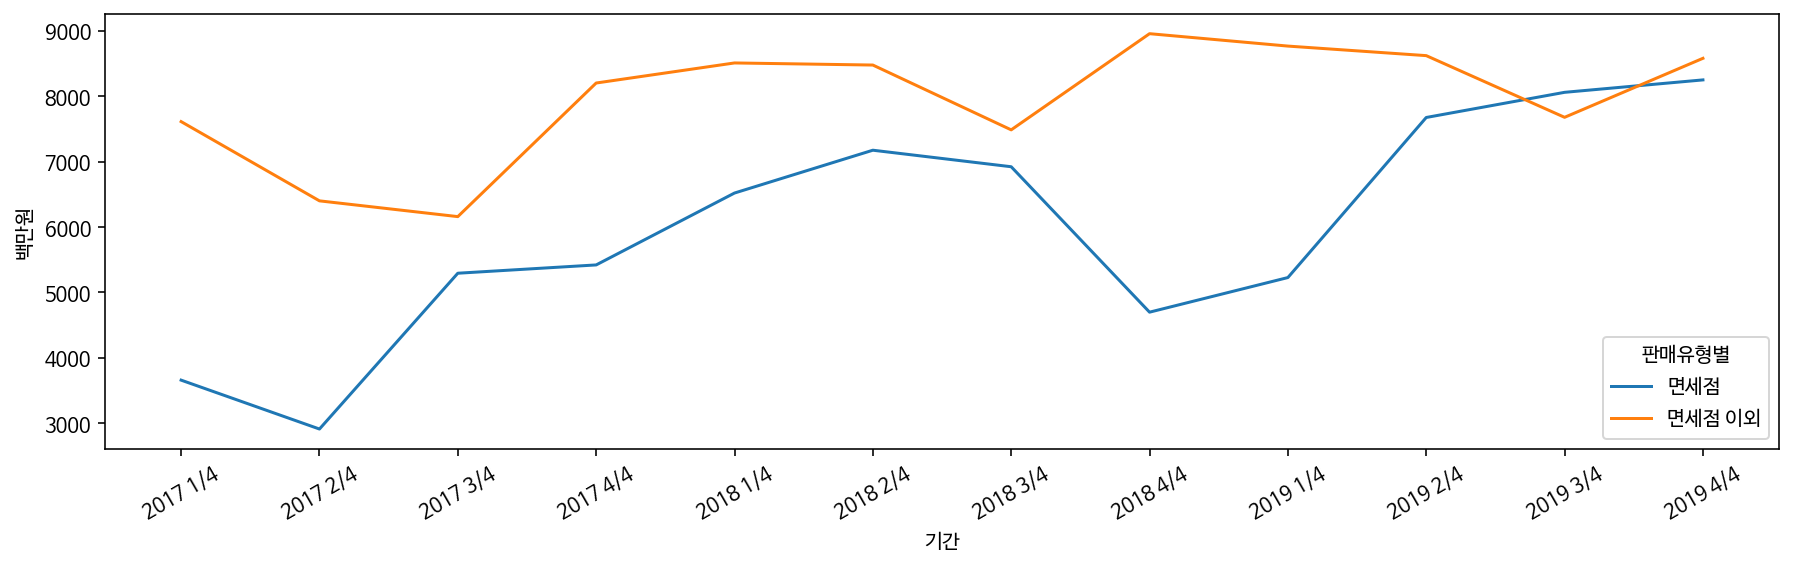

In [ ]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "판매유형별"로 다른 색상으로 표시하기
df_fashion2 = df[(df['상품군별'] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data =df_fashion2, x = "기간", y = "백만원", hue = "판매유형별", ci = None)

### 데이터 집계하기

In [ ]:
# 피봇테이블로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기
result = pd.pivot_table(data = df_fashion, index = "국가(대륙)별", columns = "연도",
               values = "백만원", aggfunc = 'sum') # aggfunc의 기본값은 mean

### 연산결과를 시각적으로 보기

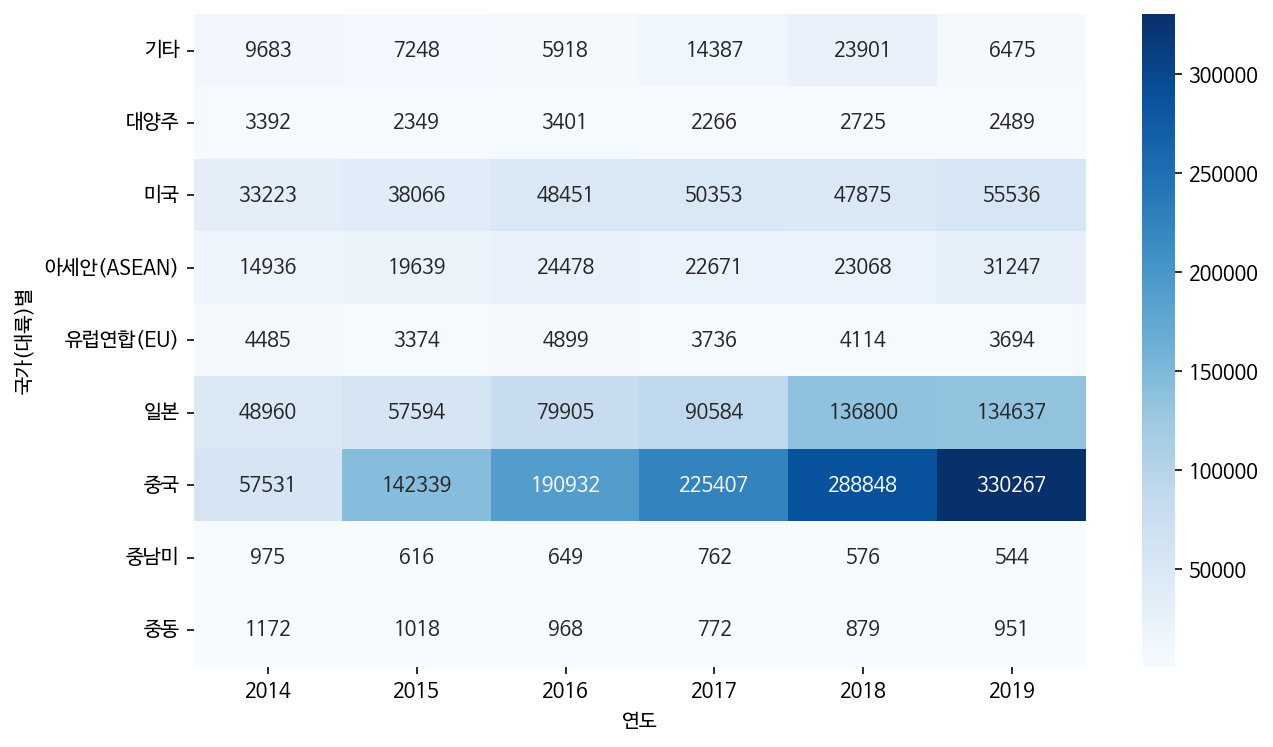

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(result, cmap = "Blues", annot = True, fmt = ".0f") # 밝을수록 숫자가 높은 것 / annot는 숫자를 같이 표시하는 것. / fmt는 소수점 몇째자리까지 표현할 것인지
# 중국의 경우에 2019년으로 갈수록 증가함

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

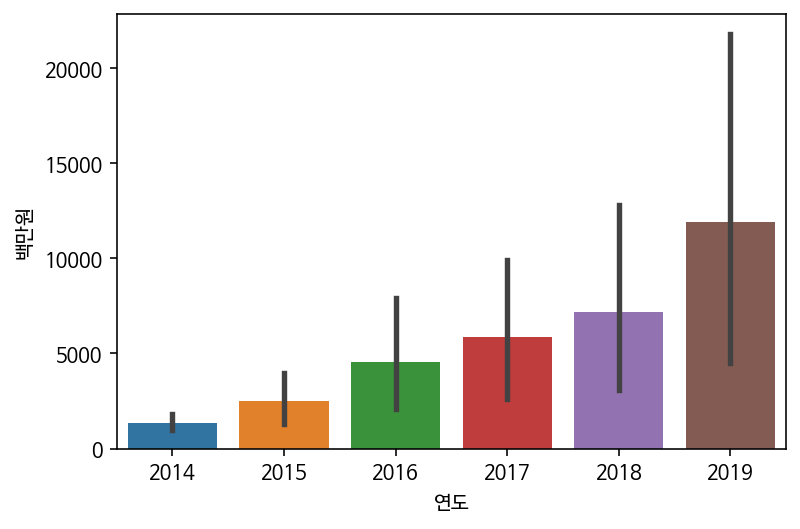

In [ ]:
# "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화하기

sns.barplot(data = df_total, x = "연도", y = "백만원")

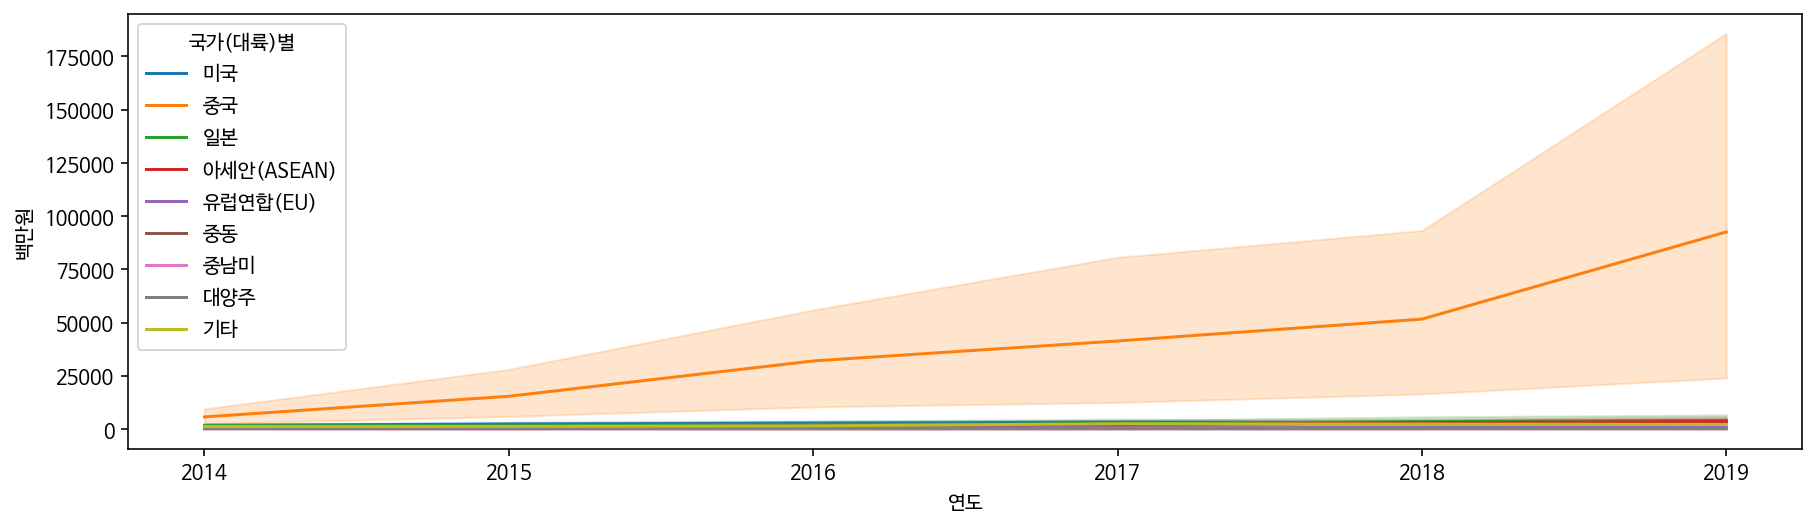

In [ ]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기

plt.figure(figsize = (15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "국가(대륙)별")

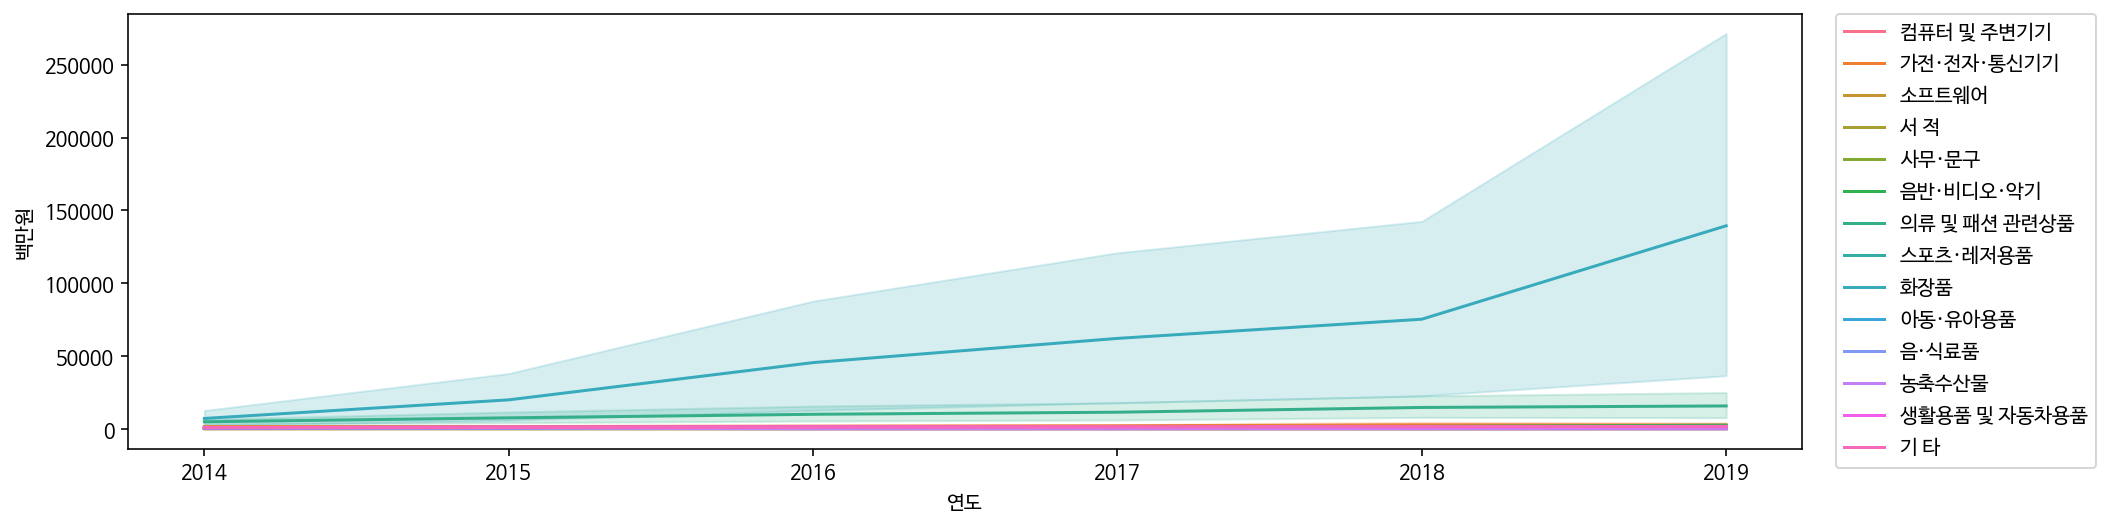

In [ ]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기

plt.figure(figsize = (15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별")
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0.)

# 화장품이 가장 많이 판매가 된 것을 확인할 수 있음